In [10]:
import numpy as np 
import xarray as xr
import netCDF4
import matplotlib.pyplot as plt

import os 
import glob

import tqdm

In [3]:
year_list = [1979, 2015]

folder = '/mnt/drive5/ERAINTERIM'

for year in tqdm.tqdm_notebook(range(year_list[0], year_list[1]+1), total=year_list[1]-year_list[0]+1):
    u_file = os.path.join(folder, f'U10/U10_{year}.nc') 
    v_file = os.path.join(folder, f'V10/V10_{year}.nc') 
    
    u_ds = xr.open_dataset(u_file)
    v_ds = xr.open_dataset(v_file)
    u = u_ds['var165']
    v = v_ds['var166']
    u_ds.close()
    v_ds.close()
    
    w = (u**2 + v**2)**.5
    
    # creating the output file
    out_ds = xr.Dataset({'uv10': w})
    out_file = os.path.join(folder, f'UV10/UV10_{year}.nc')
    out_ds.to_netcdf(out_file)
   

/home/jj/anaconda3/envs/mcms/lib/python3.6/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


In [4]:
out_ds = xr.Dataset({'uv10': w})

In [5]:
print(out_ds)

<xarray.Dataset>
Dimensions:  (lat: 121, lon: 240, time: 1460)
Coordinates:
  * lon      (lon) float64 0.0 1.5 3.0 4.5 6.0 ... 352.5 354.0 355.5 357.0 358.5
  * lat      (lat) float64 90.0 88.5 87.0 85.5 84.0 ... -85.5 -87.0 -88.5 -90.0
  * time     (time) datetime64[ns] 2015-01-01 ... 2015-12-31T18:00:00
Data variables:
    uv10     (time, lat, lon) float32 8.788179 8.756237 ... 4.9855247 5.011567


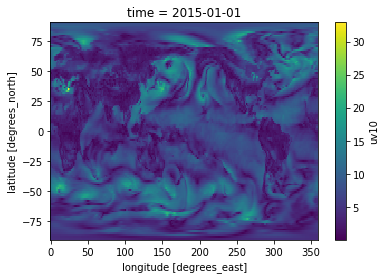

In [6]:
out_ds.uv10.isel(time=0).plot()